In [6]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from glob import glob
from PIL import Image

In [7]:
dfL=pd.DataFrame(glob(r'C:/Users/ASUS/Desktop/עבודת גמר/train/7554/SimpleTest/*'))
dfL

,0
0,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
1,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
2,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
3,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
4,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
5,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
6,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
7,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
8,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...
9,C:/Users/ASUS/Desktop/עבודת גמר/train/7554/Sim...


In [8]:
dfL.columns=['locations']
dfL['locations']=dfL['locations'].apply(lambda x:np.nan if 'png' in x.lower() else x)
dfL.dropna(inplace =True)

In [9]:
array=np.arange(1,23)
dfL['index']=array
dfL.set_index('index',inplace=True)

In [10]:
url=dfL.iloc[3].locations
df=pd.read_csv(url)
df

,X,Y,Pressure,TiltX,TiltY,Time
0,688.818570273704,526.514378,0.071031,-4515.0,2197.0,00:18.1988702
1,688.66058436309,525.724449,0.078355,-4515.0,2197.0,00:18.2144819
2,688.29195057166,523.670632,0.089586,-4515.0,2197.0,00:18.2302213
3,687.607344959002,520.405590,0.152819,-4515.0,2197.0,00:18.2458102
4,686.764753435732,517.719829,0.191394,-4515.0,2197.0,00:18.2613566
...,...,...,...,...,...,...
524,744.008315047927,252.882781,0.682612,-2757.0,-1514.0,00:27.5764537
525,745.324864303037,252.988105,0.672847,-2757.0,-1514.0,00:27.5920828
526,747.852638872849,253.304077,0.630610,-2757.0,-1514.0,00:27.6077052
527,Time Elapsed till drawing started: 00:04.9671808,NaN,NaN,NaN,NaN,NaN


In [17]:
df.rename(columns={' X':'X',' Y':'Y',' Pressure':'Pressure',' TiltX':'TiltX',' TiltY':'TiltY',' Time':'Time'},inplace=True)
df.dropna(inplace=True)
df['X']=df['X'].astype(float)

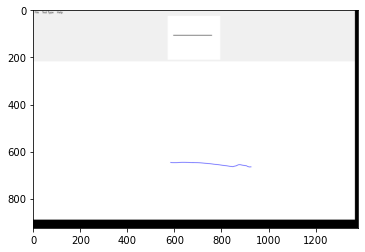

In [12]:
img = Image.open(r'C:\Users\ASUS\Desktop\עבודת גמר\train\7554\SimpleTest\1.png')
plt.imshow(img)

In [40]:
time_in_float=df['Time'].apply(lambda x:x.split(':')[1] if(True) else 0)
time_in_float=time_in_float.astype(float)

In [41]:
time_in_float.std()

3.0024349770525642

In [44]:
time_in_float

0      18.198870
1      18.214482
2      18.230221
3      18.245810
4      18.261357
         ...    
522    27.544770
523    27.560360
524    27.576454
525    27.592083
526    27.607705
Name: Time, Length: 527, dtype: float64